In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import torchvision

import torchvision.transforms as transforms

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [10]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170499072it [00:43, 3905327.93it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [13]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [14]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [15]:
type(trainset[0])

tuple

In [26]:
len(trainset)

50000

In [27]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([4, 3, 32, 32])
torch.Size([4])


[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


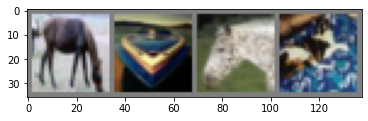

horse ship  horse cat  


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    # fig = plt.figure(figsize=(12,6))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

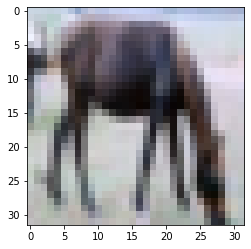

In [76]:
imshow(torchvision.utils.make_grid(images[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


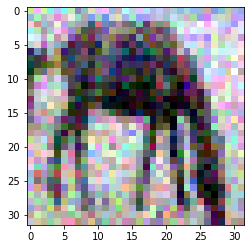

In [42]:
imshow(torchvision.utils.make_grid(images[0]+torch.Tensor(np.random.normal(0.0, 0.25, (1,3,32,32)))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


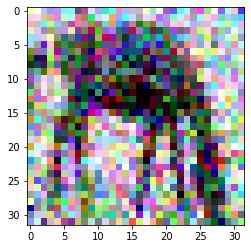

In [45]:
imshow(torchvision.utils.make_grid(images[0]+torch.Tensor(np.random.normal(0.0, 0.5, (1,3,32,32)))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


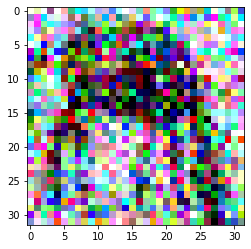

In [46]:
imshow(torchvision.utils.make_grid(images[0]+torch.Tensor(np.random.normal(0.0, 0.75, (1,3,32,32)))))

In [47]:
#create lists for sorting of data
trainset_0 = []
trainset_1 = []
trainset_2 = []
trainset_3 = []
trainset_4 = []
trainset_5 = []
trainset_6 = []
trainset_7 = []
trainset_8 = []
trainset_9 = []

In [50]:
#creates a dictionary called dictionaryData to sort the different labels
dictionaryData = {}
for k in range(10):
  dictionaryData['trainset_'+str(k)] = []
for i in range(50000):
  dictionaryData['trainset_'+str(trainset[i][1])].append(trainset[i])

In [51]:
for i in range(10):
  print ("number of " + str(i) + ": " + str(len(dictionaryData['trainset_' + str(i)])))

number of 0: 5000
number of 1: 5000
number of 2: 5000
number of 3: 5000
number of 4: 5000
number of 5: 5000
number of 6: 5000
number of 7: 5000
number of 8: 5000
number of 9: 5000


In [55]:

dictionary1 = {}
for k in range(5):
  startIndex = 1000*k
  stopIndex = 1000*(k+1)
  dictionary1['trainset_1_'+str(k+1)] = []
  for i in range(10):
    dictionary1['trainset_1_'+str(k+1)].extend(dictionaryData['trainset_'+str(i)][startIndex:stopIndex])

In [56]:
for i in range(5):
  print(len(dictionary1['trainset_1_'+str(i+1)]))

10000
10000
10000
10000
10000


In [60]:

dictionary2 = {}
for k in range(5):
  dictionary2['trainset_2_'+str(k+1)] = []

#create data for trainset_2_1 which has 40% of 0 and 1
dictionary2['trainset_2_1'].extend(dictionaryData['trainset_0'][0:int(10000*0.4)]) # 0: indexes 0:4336  
dictionary2['trainset_2_1'].extend(dictionaryData['trainset_1'][0:int(10000*0.4)]) # 1: indexes 0:4336
for a in range(2,10):
  dictionary2['trainset_2_1'].extend(dictionaryData['trainset_'+str(a)][0:250]) # 2-9: indexes 0:250

#create data for trainset_2_2 which has 40% of 2 and 3
dictionary2['trainset_2_2'].extend(dictionaryData['trainset_0'][int(10000*0.4):int(10000*0.4)+250]) # 0: 
dictionary2['trainset_2_2'].extend(dictionaryData['trainset_1'][int(10000*0.4):int(10000*0.4)+250]) # 1: 
dictionary2['trainset_2_2'].extend(dictionaryData['trainset_2'][250:int(10000*0.4)+250]) #2: 
dictionary2['trainset_2_2'].extend(dictionaryData['trainset_3'][250:int(10000*0.4)+250]) #3: 
for b in range(4,10):
  dictionary2['trainset_2_2'].extend(dictionaryData['trainset_'+str(b)][250:(250*2)]) # 4-9: 
#create data for trainset_2_3 which has 40% of 4 and 5
for i in range(4):
  dictionary2['trainset_2_3'].extend(dictionaryData['trainset_'+str(i)][int(10000*0.4)+250:int(10000*0.4)+250*2]) #0-3: 
dictionary2['trainset_2_3'].extend(dictionaryData['trainset_4'][(250*2):int(10000*0.4)+250*2]) #4: 
dictionary2['trainset_2_3'].extend(dictionaryData['trainset_5'][(250*2):int(10000*0.4)+250*2]) #5: 
for c in range(6,10):
  dictionary2['trainset_2_3'].extend(dictionaryData['trainset_'+str(c)][250*2:(250*3)]) # 6-9: 

#create data for trainset_2_4 which has 40% of 6 and 7
for i in range(6):
  dictionary2['trainset_2_4'].extend(dictionaryData['trainset_'+str(i)][int(10000*0.4)+250*2:int(10000*0.4)+250*3]) #0-5: indexes 3794:4607
dictionary2['trainset_2_4'].extend(dictionaryData['trainset_6'][250*3:int(10000*0.4)+250*3]) #6: 
dictionary2['trainset_2_4'].extend(dictionaryData['trainset_7'][250*3:int(10000*0.4)+250*3]) #7: 
for d in range(8,10):
  dictionary2['trainset_2_4'].extend(dictionaryData['trainset_'+str(d)][250*3:(250*4)]) # 8-9: 

#create data for trainset_2_5 which has 40% of 8 and 9
for i in range(8):
  dictionary2['trainset_2_5'].extend(dictionaryData['trainset_'+str(i)][int(10000*0.4)+250*3:int(10000*0.4)+250*4])
for e in range(8,10):
  dictionary2['trainset_2_5'].extend(dictionaryData['trainset_'+str(e)][250*4:int(10000*0.4)+250*4])

for i in range(5):
  print("trainset_2_", str(i+1), len(dictionary2['trainset_2_'+str(i+1)]))

trainset_2_ 1 10000
trainset_2_ 2 10000
trainset_2_ 3 10000
trainset_2_ 4 10000
trainset_2_ 5 10000


In [61]:
#creates a dictionary3 for splitting of data in case 3

dictionary3 = {}
for k in range(5):
  dictionary3['trainset_3_'+str(k+1)] = []
for i in range(10):
  dictionary3['trainset_3_1'].extend(dictionaryData['trainset_'+str(i)][0:250*(2)])
  dictionary3['trainset_3_2'].extend(dictionaryData['trainset_'+str(i)][250*(2):250*(5)])
  dictionary3['trainset_3_3'].extend(dictionaryData['trainset_'+str(i)][250*(5):250*(9)])
  dictionary3['trainset_3_4'].extend(dictionaryData['trainset_'+str(i)][250*(9):250*(14)])
  dictionary3['trainset_3_5'].extend(dictionaryData['trainset_'+str(i)][250*(14):250*(20)])

for i in range(5):
  print(len(dictionary3['trainset_3_'+str(i+1)]))

5000
7500
10000
12500
15000


In [154]:
dictionary4 = {}
# deepcopy the data in dictionary1
for i in range(len(dictionary1)):
  dictionary4["trainset_4_"+str(i+1)] = copy.deepcopy(dictionary1["trainset_1_"+str(i+1)]) 
percentageMislabel = {"trainset_4_1": 0, "trainset_4_2": 0.05, "trainset_4_3": 0.10, "trainset_4_4": 0.15, "trainset_4_5": 0.20}

In [156]:
for i in range(len(dictionary4)):
  trainset_4_i = "trainset_4_" + str(i+1)
  numMislabel = int(percentageMislabel[trainset_4_i] * len(dictionary4[trainset_4_i]))
  print("For trainset_" + str(i) + ", number of mislabelled data is: ", numMislabel)
  indexesMislabel = random.sample(range(len(dictionary4[trainset_4_i])), numMislabel) # generate a random sample of indices without replacement)
  print(len(indexesMislabel))

  for k in indexesMislabel: 
    trueLabel = dictionary4[trainset_4_i][i][1]

    possibleMislabel = [x for x in range(10) if x != trueLabel] # list of all the possible mislabels to choose from
    dictionary4[trainset_4_i][k] = (dictionary4[trainset_4_i][k][0], random.choice(possibleMislabel)) # change the label for the k-th entry 
  print("Done", i)
    

For trainset_0, number of mislabelled data is:  0
0
Done 0
For trainset_1, number of mislabelled data is:  500
500
Done 1
For trainset_2, number of mislabelled data is:  1000
1000
Done 2
For trainset_3, number of mislabelled data is:  1500
1500
Done 3
For trainset_4, number of mislabelled data is:  2000
2000
Done 4


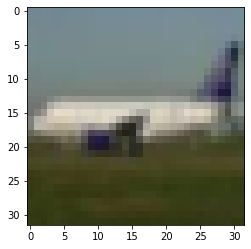

The label is : car


In [157]:
index = 599
# imshow(torchvision.utils.make_grid(images[0]))
img_ = torchvision.utils.make_grid(dictionary4["trainset_4_5"][index][0])
imshow(img_)
print("The label is :", classes[dictionary4["trainset_4_5"][index][1]])

In [158]:
dictionary5 = {}

In [159]:
# deepcopy the data in dictionary1
for i in range(len(dictionary1)):
  dictionary5["trainset_5_"+str(i+1)] = copy.deepcopy(dictionary1["trainset_1_"+str(i+1)])

In [160]:
percentageNoise = {"trainset_5_2": 0.25, "trainset_5_3": 0.5, "trainset_5_4": 0.75, "trainset_5_5": 1.0}

In [162]:
for i in range(1, len(dictionary5)):
  trainset_5_i = "trainset_5_" + str(i+1)
  for index in range(len(dictionary5[trainset_5_i])):
     dictionary5[trainset_5_i][index] = (dictionary5[trainset_5_i][index][0] + \
                                         torch.Tensor(np.random.normal(0.0, percentageNoise[trainset_5_i], (1,3,32,32))), \
                                         dictionary5[trainset_5_i][index][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


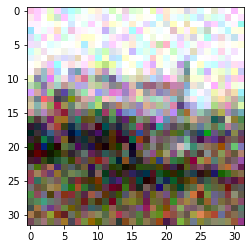

In [163]:
img_ = torchvision.utils.make_grid(dictionary5["trainset_5_2"][0][0])
imshow(img_)

In [172]:

base_dir = '/Users/no11sun/Documents/data/process_data/'

In [173]:
import pickle


dictionary1File = open(base_dir+"dictionary1.out", "wb")
pickle.dump(dictionary1, dictionary1File)
dictionary1File.close()

dictionary2File = open(base_dir+"dictionary2.out", "wb")
pickle.dump(dictionary2, dictionary2File)
dictionary2File.close()

dictionary3File = open(base_dir+"dictionary3.out", "wb")
pickle.dump(dictionary3, dictionary3File)
dictionary3File.close()

dictionary4File = open(base_dir+"dictionary4.out", "wb")
pickle.dump(dictionary4, dictionary4File)
dictionary4File.close()

dictionary5File = open(base_dir+"dictionary5.out", "wb")
pickle.dump(dictionary5, dictionary5File)
dictionary5File.close()

In [174]:
### check dictionary2
for i in range(5):
  theTrain = dictionary2["trainset_2_"+str(i+1)]
  total = len(theTrain)
  count = {}
  for k in range(10):
    count[k] = 0
  for item in theTrain:
    key = item[1]
    count[key] += 1
  print('\n',"trainset_2_"+str(i+1), sep='')
  for i in range(10):
    print("percentage of", i, "is: ", count[i]/total*100)



trainset_2_1
percentage of 0 is:  40.0
percentage of 1 is:  40.0
percentage of 2 is:  2.5
percentage of 3 is:  2.5
percentage of 4 is:  2.5
percentage of 5 is:  2.5
percentage of 6 is:  2.5
percentage of 7 is:  2.5
percentage of 8 is:  2.5
percentage of 9 is:  2.5

trainset_2_2
percentage of 0 is:  2.5
percentage of 1 is:  2.5
percentage of 2 is:  40.0
percentage of 3 is:  40.0
percentage of 4 is:  2.5
percentage of 5 is:  2.5
percentage of 6 is:  2.5
percentage of 7 is:  2.5
percentage of 8 is:  2.5
percentage of 9 is:  2.5

trainset_2_3
percentage of 0 is:  2.5
percentage of 1 is:  2.5
percentage of 2 is:  2.5
percentage of 3 is:  2.5
percentage of 4 is:  40.0
percentage of 5 is:  40.0
percentage of 6 is:  2.5
percentage of 7 is:  2.5
percentage of 8 is:  2.5
percentage of 9 is:  2.5

trainset_2_4
percentage of 0 is:  2.5
percentage of 1 is:  2.5
percentage of 2 is:  2.5
percentage of 3 is:  2.5
percentage of 4 is:  2.5
percentage of 5 is:  2.5
percentage of 6 is:  40.0
percentage o